### Capstone Project Data Exploration - 
#### Data - Polish Companies Bankruptcy data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,auc,confusion_matrix


In [3]:
PC_variables = pd.read_excel("Vaiables defined.csv.xlsx")
PC_variables

,Variable,defined,Variable.1,defined.1
0,X1,net profit / total assets,X33,operating expenses / short-term liabilities
1,X2,total liabilities / total assets,X34,operating expenses / total liabilities
2,X3,working capital / total assets,X35,profit on sales / total assets
3,X4,current assets / short-term liabilities,X36,total sales / total assets
4,X5,[(cash + short-term securities + receivables -...,X37,(current assets - inventories) / long-term li...
5,X6,retained earnings / total assets,X38,constant capital / total assets
6,X7,EBIT / total assets,X39,profit on sales / sales
7,X8,book value of equity / total liabilities,X40,(current assets - inventory - receivables) / ...
8,X9,sales / total assets,X41,total liabilities / ((profit on operating act...
9,X10,equity / total assets,X42,profit on operating activities / sales


In [4]:
PC_data = pd.read_csv("Polish companies data.csv",na_values = ['?','-'])
PC_data.shape

(43545, 66)

In [5]:
PC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43545 entries, 0 to 43544
Data columns (total 66 columns):
Year     43545 non-null int64
X1       43536 non-null float64
X2       43536 non-null float64
X3       43536 non-null float64
X4       43410 non-null float64
X5       43456 non-null float64
X6       43536 non-null float64
X7       43536 non-null float64
X8       43450 non-null float64
X9       43536 non-null float64
X10      43536 non-null float64
X11      43500 non-null float64
X12      43410 non-null float64
X13      43417 non-null float64
X14      43536 non-null float64
X15      43509 non-null float64
X16      43449 non-null float64
X17      43450 non-null float64
X18      43536 non-null float64
X19      43416 non-null float64
X20      43417 non-null float64
X21      37648 non-null float64
X22      43536 non-null float64
X23      43417 non-null float64
X24      42622 non-null float64
X25      43536 non-null float64
X26      43449 non-null float64
X27      40739 non-null float

In [6]:
#replace absurd values
# PC_data = PC_data.replace(['?','-'],np.nan)

In [6]:
PC_data.tail()

,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
43540,5,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1.0
43541,5,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1.0
43542,5,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1.0
43543,5,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1.0
43544,5,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,1.0


In [8]:
# PC_data.iloc[:,1:-1] = PC_data.iloc[:,1:-1].astype('float')?

In [9]:
# PC_data.info()

In [7]:
PC_data.Class.value_counts()

0.0    40547
1.0     2154
Name: Class, dtype: int64

In [8]:
PC_data.head(2)

,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0


In [9]:
# drop values who do not have class
PC_data_1 = PC_data[np.isnan(PC_data.Class) != True ]

PC_data_1.shape

(42701, 66)

In [10]:
PC_data_1=PC_data_1.drop('X37',axis=1)

In [11]:
# Seperate the yearly data for better analysis
First=PC_data_1.iloc[np.where(PC_data_1['Year']==1)]
Second=PC_data_1.iloc[np.where(PC_data_1['Year']==2)]
Third=PC_data_1.iloc[np.where(PC_data_1['Year']==3)]
Fourth=PC_data_1.iloc[np.where(PC_data_1['Year']==4)]
Fifth=PC_data_1.iloc[np.where(PC_data_1['Year']==5)]
# Firstcr=First.corrwith(First['Class'])
# Secondcr=Second.corrwith(Second['Class'])
# Thirdcr=Third.corrwith(Third['Class'])

# Fourthcr=Fourth.corrwith(Fourth['Class'])

# Fifthcr=Fifth.corrwith(Fifth['Class'])


In [12]:
# impute median values for missing values specific to years
Fifth=Fifth.fillna(Fifth.median())
Fifth.shape

(5980, 65)

In [13]:
Fourth=Fourth.fillna(Fourth.median())
Fourth.shape

(9862, 65)

In [14]:
Third=Third.fillna(Third.median())
Third.shape

(10503, 65)

In [15]:
Second=Second.fillna(Second.median())
Second.shape

(10173, 65)

In [16]:
First=First.fillna(First.median())
First.shape


(6183, 65)

In [17]:
# Append all data again to a single dataframe
Frames=[First,Second,Third,Fourth]
Training_set=pd.concat(Frames)
Training_set.shape
Training_set.head()

(36721, 65)

,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Class
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [18]:
# split first 4 year data into test and validation
Y=Training_set['Class']
X=Training_set.drop(['Year','Class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25704, 63)
(25704,)
(11017, 63)
(11017,)


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
# print('Covariance Matrix \n%s', train_cov_matrix)

In [22]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
# print('Eigen Vectors \n%s', eigenvectors)
# print('\n Eigen Values \n%s', eigenvalues)

In [23]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
# print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
# print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

In [24]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%



<IPython.core.display.Javascript object>


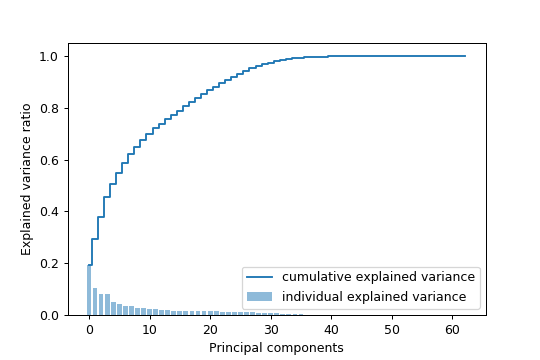

<BarContainer object of 63 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

In [25]:
%matplotlib nbagg
plt.bar(range(0,63), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,63),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [27]:
from sklearn.decomposition import PCA

In [28]:
scikit_pca = PCA(n_components=28)
X_spca = scikit_pca.fit_transform(X_train_std)
X_spca.shape

(25704, 28)

In [29]:
# 35 components explain 99% of data
scikit_pca.explained_variance_ratio_.sum()

0.9535838327782789

In [30]:
x_val = sc.transform(X_test)
X_test_pc=scikit_pca.transform(x_val)

#### Fit ML Models

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LL_model = LogisticRegression()
LL_model.fit(X_spca,y_train)

C:\Users\sreeharsha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred_L= LL_model.predict(X_test_pc)
print('Accuracy of logistic regression classifier on Train set: {:.2f}'.format(LL_model.score(X_spca,y_train)))# use accuracy score

Accuracy of logistic regression classifier on Train set: 0.96


In [34]:
print('Accuracy of logistic regression classifier on est set: {:.2f}'.format(LL_model.score(X_test_pc,y_test)))

Accuracy of logistic regression classifier on est set: 0.95


In [35]:
acc=accuracy_score(y_test,y_pred_L)
acc

0.949441771807207

In [36]:
y_test.sum()

548.0

In [39]:
cf=confusion_matrix(y_test,y_pred_L)
print(cf)
print('Rows are Actuals')
print('columns are Predicted')

[[10459    10]
 [  547     1]]
Rows are Actuals
columns are Predicted


In [40]:
print(classification_report(y_test,y_pred_L))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10469
         1.0       0.09      0.00      0.00       548

   micro avg       0.95      0.95      0.95     11017
   macro avg       0.52      0.50      0.49     11017
weighted avg       0.91      0.95      0.93     11017



In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)
dt_model.fit(X_spca,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_pred=dt_model.predict(X_test_pc)
dt_model.score(X_spca,y_train)

0.9814814814814815

In [44]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
# from sklearn.model_selection import cross_val_score

In [45]:
acc=accuracy_score(y_test,y_pred)
acc

0.9274757193428338

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     10469
         1.0       0.15      0.10      0.12       548

   micro avg       0.93      0.93      0.93     11017
   macro avg       0.55      0.54      0.54     11017
weighted avg       0.91      0.93      0.92     11017



In [47]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[10162,   307],
       [  492,    56]], dtype=int64)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RF_model = RandomForestClassifier(criterion = 'entropy', n_estimators=15,max_depth = 12)
RF_model.fit(X_spca,y_train)


y_pred_RF=RF_model.predict(X_test_pc)
RF_model.score(X_spca,y_train)


acc=accuracy_score(y_test,y_pred_RF)
acc

print(classification_report(y_test,y_pred_RF))

cf=confusion_matrix(y_test,y_pred_RF)
cf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9622626828509181

0.949804847054552

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10469
         1.0       0.33      0.01      0.02       548

   micro avg       0.95      0.95      0.95     11017
   macro avg       0.64      0.50      0.50     11017
weighted avg       0.92      0.95      0.93     11017



array([[10459,    10],
       [  543,     5]], dtype=int64)

In [50]:
from xgboost import XGBClassifier

In [51]:
XG_model = XGBClassifier(max_depth=12,n_estimators=100)
XG_model.fit(X_spca,y_train)
XG_model.score(X_spca,y_train)

y_pred_XG=XG_model.predict(X_test_pc)

acc=accuracy_score(y_test,y_pred_XG)
acc

cf=confusion_matrix(y_test,y_pred_XG)
print(cf)

print(classification_report(y_test,y_pred_XG))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

0.9954870837223778

0.9491694653716983

[[10426    43]
 [  517    31]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10469
         1.0       0.42      0.06      0.10       548

   micro avg       0.95      0.95      0.95     11017
   macro avg       0.69      0.53      0.54     11017
weighted avg       0.93      0.95      0.93     11017



In [109]:
# create model
model_nn = Sequential()
model_nn.add(Dense(100, input_dim=28, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
# Compile model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#if regression RMSE in metrics

model_nn.fit(X_spca,y_train, validation_data=(X_test_pc,y_test), epochs=150, batch_size=10)

#Prediction
prediction1 = model_nn.predict_classes(X_test_pc)

# Accuracy
print("F1-Score:",f1_score(y_test,prediction1)) 
print("Accuracy:", accuracy_score(y_test,prediction1))
results.append(f1_score(y_test,prediction1))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction1))
print("Classification Report:  \n", classification_report(y_test,prediction1))

Train on 25704 samples, validate on 11017 samples
Epoch 1/150
25704/25704 [==============================] - 7s 282us/step - loss: 0.1819 - acc: 0.9558 - val_loss: 0.1964 - val_acc: 0.9503
Epoch 2/150
25704/25704 [==============================] - 6s 219us/step - loss: 0.1710 - acc: 0.9562 - val_loss: 0.1881 - val_acc: 0.9503
Epoch 3/150
25704/25704 [==============================] - 6s 219us/step - loss: 0.1694 - acc: 0.9562 - val_loss: 0.1861 - val_acc: 0.9503
Epoch 4/150
25704/25704 [==============================] - 6s 219us/step - loss: 0.1676 - acc: 0.9562 - val_loss: 0.1866 - val_acc: 0.9503
Epoch 5/150
25704/25704 [==============================] - 6s 218us/step - loss: 0.1679 - acc: 0.9562 - val_loss: 0.1870 - val_acc: 0.9503
Epoch 6/150
25704/25704 [==============================] - 6s 218us/step - loss: 0.1660 - acc: 0.9562 - val_loss: 0.1830 - val_acc: 0.9503
Epoch 7/150
25704/25704 [==============================] - 6s 215us/step - loss: 0.1661 - acc: 0.9562 - val_loss: 0.

Epoch 118/150
25704/25704 [==============================] - 2s 92us/step - loss: 0.1071 - acc: 0.9642 - val_loss: 0.2427 - val_acc: 0.9458
Epoch 119/150
25704/25704 [==============================] - 2s 93us/step - loss: 0.1065 - acc: 0.9644 - val_loss: 0.2438 - val_acc: 0.9465
Epoch 120/150
25704/25704 [==============================] - 2s 93us/step - loss: 0.1051 - acc: 0.9644 - val_loss: 0.2388 - val_acc: 0.9451
Epoch 121/150
25704/25704 [==============================] - 2s 92us/step - loss: 0.1054 - acc: 0.9653 - val_loss: 0.2325 - val_acc: 0.9455
Epoch 122/150
25704/25704 [==============================] - 2s 92us/step - loss: 0.1046 - acc: 0.9647 - val_loss: 0.2375 - val_acc: 0.9444
Epoch 123/150
25704/25704 [==============================] - 2s 93us/step - loss: 0.1041 - acc: 0.9653 - val_loss: 0.2464 - val_acc: 0.9452
Epoch 124/150
25704/25704 [==============================] - 2s 92us/step - loss: 0.1042 - acc: 0.9655 - val_loss: 0.2471 - val_acc: 0.9435
Epoch 125/150
25704/

F1-Score: 0.17391304347826086
Accuracy: 0.9448125624035582
Confusion Matrix:   
 [[10345   124]
 [  484    64]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     10469
         1.0       0.34      0.12      0.17       548

   micro avg       0.94      0.94      0.94     11017
   macro avg       0.65      0.55      0.57     11017
weighted avg       0.92      0.94      0.93     11017



#### balance the class of training data to improve accuracy

In [52]:
from imblearn.combine import SMOTETomek

In [53]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_spca,y_train)

In [54]:
LL_model2 = LogisticRegression()
LL_model2.fit(X_res,y_res)

y_pred_L2= LL_model2.predict(X_test_pc)
LL_model2.score(X_res,y_res)

acc=accuracy_score(y_test,y_pred_L2)
acc

print(classification_report(y_test,y_pred_L2))

cf=confusion_matrix(y_test,y_pred_L2)
cf

C:\Users\sreeharsha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

0.6269265453353009

0.6399201234455841

              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77     10469
         1.0       0.08      0.60      0.14       548

   micro avg       0.64      0.64      0.64     11017
   macro avg       0.52      0.62      0.46     11017
weighted avg       0.92      0.64      0.74     11017



array([[6723, 3746],
       [ 221,  327]], dtype=int64)

In [57]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_split=2)
dt_model2.fit(X_res,y_res)


y_pred2=dt_model2.predict(X_test_pc)
dt_model2.score(X_res,y_res)

acc=accuracy_score(y_test,y_pred2)
acc

cf=confusion_matrix(y_test,y_pred2)
print(cf)

print(classification_report(y_test,y_pred2))



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.9072183964584358

0.7574657347735319

[[8086 2383]
 [ 289  259]]
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86     10469
         1.0       0.10      0.47      0.16       548

   micro avg       0.76      0.76      0.76     11017
   macro avg       0.53      0.62      0.51     11017
weighted avg       0.92      0.76      0.82     11017



In [59]:
RF_model2 = RandomForestClassifier(criterion = 'entropy', n_estimators=100,max_depth = 12)
RF_model2.fit(X_res,y_res)

RF_model2.score(X_res,y_res)
y_pred_RF2=RF_model2.predict(X_test_pc)


acc=accuracy_score(y_test,y_pred_RF2)
acc

cf=confusion_matrix(y_test,y_pred_RF2)
print(cf)

print(classification_report(y_test,y_pred_RF2))



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9249877029021151

0.8031224471271671

[[8551 1918]
 [ 251  297]]
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     10469
         1.0       0.13      0.54      0.21       548

   micro avg       0.80      0.80      0.80     11017
   macro avg       0.55      0.68      0.55     11017
weighted avg       0.93      0.80      0.85     11017



In [60]:
XG_model2 = XGBClassifier(max_depth=15,learning_rate=0.1)
XG_model2.fit(X_res,y_res)
XG_model2.score(X_res,y_res)

y_pred_XG2=XG_model2.predict(X_test_pc)

acc=accuracy_score(y_test,y_pred_XG2)
acc

cf=confusion_matrix(y_test,y_pred_XG2)
print(cf)

print(classification_report(y_test,y_pred_XG2))



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

0.999754058042302

0.9081419624217119

[[9854  615]
 [ 397  151]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     10469
         1.0       0.20      0.28      0.23       548

   micro avg       0.91      0.91      0.91     11017
   macro avg       0.58      0.61      0.59     11017
weighted avg       0.92      0.91      0.92     11017



In [92]:
# from sklearn.metrics import roc_curve
# fpr, tpr, threasholds = roc_curve(y_test,y_pred_XG2,pos_label=2)
# auc(fpr, tpr)

C:\Users\sreeharsha\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

In [61]:
resultsDf = pd.DataFrame(index=['Logistic Regression','DecisionTree', 
                                 'RandomForest','XGBoost'])
results = []

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [67]:
##### 1. Logistic Regression
# Make the instance
model = LogisticRegression()
params={}
model0 = GridSearchCV(model,param_grid=params, n_jobs=-1, cv=10)
# Train the model
model0.fit(X_res,y_res)
# Prediction
prediction = model0.predict(X_test_pc)
## Evaluation
# Accuracy
print("F1-Score:", f1_score(y_test,prediction))
print("Accuracy:", accuracy_score(y_test,prediction))
results.append(f1_score(y_test,prediction))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction))
print("Classification Report:  \n", classification_report(y_test,prediction))

C:\Users\sreeharsha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

F1-Score: 0.14152780783380223
Accuracy: 0.6399201234455841
Confusion Matrix:   
 [[6723 3746]
 [ 221  327]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.97      0.64      0.77     10469
         1.0       0.08      0.60      0.14       548

   micro avg       0.64      0.64      0.64     11017
   macro avg       0.52      0.62      0.46     11017
weighted avg       0.92      0.64      0.74     11017



In [68]:
##### 2. Decision Tree Classifier
# Make the instance
model= DecisionTreeClassifier(random_state=7,criterion='entropy')
#Hyper Parameters Set
params = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[2,3,4,5,6,7,8,9,10,11],
          'max_depth':[5,12,10,15,20]}
#Make ML model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=10)
#Train the model
model1.fit(X_res,y_res)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test_pc)
## Evaluation
# Accuracy
print("F1-Score:",f1_score(y_test,prediction))
print("Accuracy:", accuracy_score(y_test,prediction))
results.append(f1_score(y_test,prediction))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction))
print("Classification Report:  \n", classification_report(y_test,prediction))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_depth': [5, 12, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Hyper Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
F1-Score: 0.1684299619128227
Accuracy: 0.8216392847417627
Confusion Matrix:   
 [[8853 1616]
 [ 349  199]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     10469
         1.0       0.11      0.36      0.17       548

   micro avg       0.82      0.82      0.82     11017
   macro avg       0.54      0.60      0.53     11017
weighted avg       0.92      0.82      0.86     11017



In [ ]:
##### 3. RandomForest
#Make ML model the instance
model = RandomForestClassifier(random_state=7, criterion='entropy')
#Hyper Parameters Set
params = {'n_estimators':[10,15,20,25,30],
          'max_depth': [5, 15, 25, 50], 
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'max_features':[5, 10, 20]}
#Make ML model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
#Train the model
model1.fit(X_res,y_res)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test_pc)
## Evaluation
# Accuracy
print("F1-Score:",f1_score(y_test,prediction)) 
print("Accuracy:", accuracy_score(y_test,prediction))
results.append(f1_score(y_test,prediction))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction))
print("Classification Report:  \n", classification_report(y_test,prediction))

C:\Users\sreeharsha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [64]:
##### 4. XGBoost
#Make ML model the instance
model = XGBClassifier(random_state=7)
#Hyper Parameters Set
params = {'n_estimators':[10,15,20,25,30,50,100],
          'max_depth': [5, 15, 25, 50]}
#Make ML model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
#Train the model
model1.fit(X_res,y_res)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test_pc)
## Evaluation
# Accuracy
print("F1-Score:",f1_score(y_test,prediction)) 
print("Accuracy:", accuracy_score(y_test,prediction))
results.append(f1_score(y_test,prediction))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction))
print("Classification Report:  \n", classification_report(y_test,prediction))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=7,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 15, 20, 25, 30, 50, 100], 'max_depth': [5, 15, 25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Hyper Parameters: {'max_depth': 50, 'n_estimators': 100}
F1-Score: 0.22809917355371903
Accuracy: 0.9152219297449397
Confusion Matrix:   
 [[9945  524]
 [ 410  138]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     10469
         1.0       0.21      0.25      0.23       548

   micro avg       0.92      0.92      0.92     11017
   macro avg       0.58      0.60      0.59     11017
weighted avg       0.92      0.92      0.92     11017



In [69]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [70]:
X_res.shape

(48792, 28)

In [71]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#if regression RMSE in metrics

Instructions for updating:
Colocations handled automatically by placer.


In [72]:
model.fit(X_res,y_res, validation_data=(X_test_pc,y_test), epochs=50, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Train on 48792 samples, validate on 11017 samples
Epoch 1/50
48792/48792 [==============================] - 10s 203us/step - loss: 0.6023 - acc: 0.6853 - val_loss: 0.5450 - val_acc: 0.7102
Epoch 2/50
48792/48792 [==============================] - 9s 177us/step - loss: 0.5613 - acc: 0.7144 - val_loss: 0.7354 - val_acc: 0.5550
Epoch 3/50
48792/48792 [==============================] - 9s 178us/step - loss: 0.5406 - acc: 0.7229 - val_loss: 0.6285 - val_acc: 0.6161
Epoch 4/50
48792/48792 [==============================] - 9s 178us/step - loss: 0.5181 - acc: 0.7382 - val_loss: 0.5303 - val_acc: 0.7220
Epoch 5/50
48792/48792 [==============================] - 9s 177us/step - loss: 0.4961 - acc: 0.7511 - val_loss: 0.5895 - val_acc: 0.6681
Epoch 6/50
48792/48792 [==============================] - 9s 176us/step - loss: 0.4735 - acc: 0.7656 - val_loss: 0.5207 - val_acc: 0.7103
Epoch 7/50
48792/48792 [==============================] - 9s 178us/step -

In [79]:
#Prediction
prediction=model.predict(X_test_pc)

In [82]:
prediction

array([[3.7252903e-06],
       [1.4254838e-02],
       [4.8552436e-01],
       ...,
       [8.3446503e-07],
       [1.2581646e-03],
       [3.1310378e-04]], dtype=float32)

In [83]:
prediction1 = model.predict_classes(X_test_pc)

In [84]:
prediction1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [85]:
accuracy_score(y_test,prediction1)

0.8696559862031406

In [86]:
# Accuracy
print("F1-Score:",f1_score(y_test,prediction1)) 
print("Accuracy:", accuracy_score(y_test,prediction1))
results.append(f1_score(y_test,prediction1))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction1))
print("Classification Report:  \n", classification_report(y_test,prediction1))

F1-Score: 0.2178649237472767
Accuracy: 0.8696559862031406
Confusion Matrix:   
 [[9381 1088]
 [ 348  200]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     10469
         1.0       0.16      0.36      0.22       548

   micro avg       0.87      0.87      0.87     11017
   macro avg       0.56      0.63      0.57     11017
weighted avg       0.92      0.87      0.89     11017



In [87]:
# create model
model_nn = Sequential()
model_nn.add(Dense(100, input_dim=28, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
# Compile model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#if regression RMSE in metrics

model_nn.fit(X_res,y_res, validation_data=(X_test_pc,y_test), epochs=150, batch_size=10)

#Prediction
prediction1 = model_nn.predict_classes(X_test_pc)

# Accuracy
print("F1-Score:",f1_score(y_test,prediction1)) 
print("Accuracy:", accuracy_score(y_test,prediction1))
results.append(f1_score(y_test,prediction1))
# Confusion Metrix 
print("Confusion Matrix:   \n", confusion_matrix(y_test,prediction1))
print("Classification Report:  \n", classification_report(y_test,prediction1))

Train on 48792 samples, validate on 11017 samples
Epoch 1/150
48792/48792 [==============================] - 4s 92us/step - loss: 0.5927 - acc: 0.6910 - val_loss: 0.5997 - val_acc: 0.6195
Epoch 2/150
48792/48792 [==============================] - 4s 82us/step - loss: 0.5519 - acc: 0.7153 - val_loss: 0.5842 - val_acc: 0.6335
Epoch 3/150
48792/48792 [==============================] - 4s 81us/step - loss: 0.5091 - acc: 0.7425 - val_loss: 0.6301 - val_acc: 0.6180
Epoch 4/150
48792/48792 [==============================] - 4s 81us/step - loss: 0.4603 - acc: 0.7789 - val_loss: 0.6119 - val_acc: 0.6406
Epoch 5/150
48792/48792 [==============================] - 4s 82us/step - loss: 0.4272 - acc: 0.8014 - val_loss: 0.4967 - val_acc: 0.7369
Epoch 6/150
48792/48792 [==============================] - 4s 81us/step - loss: 0.4081 - acc: 0.8155 - val_loss: 0.3649 - val_acc: 0.8166
Epoch 7/150
48792/48792 [==============================] - 4s 82us/step - loss: 0.3817 - acc: 0.8286 - val_loss: 0.5632 - 

Epoch 118/150
48792/48792 [==============================] - 4s 76us/step - loss: 0.0893 - acc: 0.9707 - val_loss: 0.6117 - val_acc: 0.8796
Epoch 119/150
48792/48792 [==============================] - 4s 75us/step - loss: 0.0809 - acc: 0.9706 - val_loss: 0.6237 - val_acc: 0.8766
Epoch 120/150
48792/48792 [==============================] - 4s 76us/step - loss: 0.0853 - acc: 0.9697 - val_loss: 0.6447 - val_acc: 0.8751
Epoch 121/150
48792/48792 [==============================] - 4s 75us/step - loss: 0.0802 - acc: 0.9720 - val_loss: 0.5984 - val_acc: 0.8805
Epoch 122/150
48792/48792 [==============================] - 4s 76us/step - loss: 0.0825 - acc: 0.9710 - val_loss: 0.5962 - val_acc: 0.8901
Epoch 123/150
48792/48792 [==============================] - 4s 80us/step - loss: 0.0788 - acc: 0.9728 - val_loss: 0.5886 - val_acc: 0.8942
Epoch 124/150
48792/48792 [==============================] - 4s 76us/step - loss: 0.0806 - acc: 0.9713 - val_loss: 0.5916 - val_acc: 0.8893
Epoch 125/150
48792/

F1-Score: 0.24234527687296414
Accuracy: 0.8944358718344377
Confusion Matrix:   
 [[9668  801]
 [ 362  186]]
Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     10469
         1.0       0.19      0.34      0.24       548

   micro avg       0.89      0.89      0.89     11017
   macro avg       0.58      0.63      0.59     11017
weighted avg       0.93      0.89      0.91     11017

